# FRAUD DETECTION: FAKE JOB POSTING
## Fraud Detection to detect Fraudulent Act/Fake Posting on Job Posting Platform.

## About the project

### Fraudulent activity is a dishonest, untrue, false representation or providing a false statement, whether it was intentional or not. On daily life, we can see act of fraudulent anywhere, event in only small cases.

### Job Posting nowdays can be found anywhere, including internet. But there's some cases of Job Posting Fraud that can be found. Due to large amount of job post, it was a hard job to find fraud posting manually. By making a Fraud Detection with Machine Learning, we can handle this problem in fast and easy way.

### Objective:

Exploring and Analyze data and try to answer some question such as:
- Was the dataset's target (fraudulent vs real) skewed?
- What feature/column show high correlation to fake job posting?

Preprocessing:
- Extracting text data (cleaning, vectorize)

Model Building and Metric:
- What's the highest accuracy we can get?
- What model predict the best?

## TABLE OF CONTENT
- THE DATASET
- DATA CLEANING
- EXPLORATORY DATA ANALYSIS
- PREPROCESSING
- TRAIN-TEST SPLIT
- MODEL BUILDING
- MODEL COMPARISION

In [1]:
# library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# THE DATASET

Dataset sourced from kaggle, uploaded by Shivam Bansal: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction 

The dataset contain 18 columns and data of 18k job description with only 800 fake job posting.

In [2]:
# load data
df = pd.read_csv('dataset/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

for data cleaning, preprocessing, and EDA, we will divide features to:
numerical, categorical, and text features.

In [4]:
#numerical features:
numerical_feat = ['salary_range']

#categorical features:
categorical_feat = ['fraudulent', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education','industry', 'function']

#text features:
text_feat = ['title', 'location', 'department', 'company_profile', 'description' , 'requirements', 'benefits']

# DATA CLEANING

In [5]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
# drop job_id
df.drop('job_id', axis=1, inplace=True)

## data cleaning on numerical features:

salary range is string with format ($xxx - $xxx) let's split into 2 seperate feature 'salary_min' and 'salary_max' as integer data type.

In [7]:
# fill null
df['salary_range'].fillna('0-0', inplace=True)

# split ini 2 cols
df['salary_min'], df['salary_max'] = df['salary_range'].str.split('-', 1).str

df['salary_min'] = df['salary_min'].astype(str)
df['salary_max'] = df['salary_max'].astype(str)

In [8]:
# check for any noise data/invalid data
for idx, row in df.iterrows():
    # check if value not numerical
    if not row['salary_min'].isdigit() or not row['salary_max'].isdigit():
        print(idx, (row['salary_min'], row['salary_max']))

159 ('9', 'Dec')
1884 ('3', 'Apr')
1981 ('4', 'Apr')
2313 ('Oct', '15')
4299 ('8', 'Sep')
5538 ('40000', 'nan')
9124 ('4', 'Jun')
9902 ('10', 'Oct')
9911 ('Oct', '20')
10316 ('Jun', '18')
10785 ('10', 'Oct')
10788 ('11', 'Nov')
10860 ('10', 'Nov')
10883 ('10', 'Oct')
10889 ('10', 'Nov')
10896 ('10', 'Oct')
10905 ('10', 'Nov')
11361 ('11', 'Dec')
11495 ('2', 'Apr')
11606 ('10', 'Nov')
12421 ('10', 'Oct')
13449 ('11', 'Nov')
13482 ('2', 'Jun')
14196 ('Oct', '20')
15483 ('10', 'Oct')
17233 ('10', 'Nov')
17656 ('Dec', '25')


there's some invalid data. let's replace it with 0

In [9]:
for idx, row in df.iterrows():
    if not row['salary_min'].isdigit() or not row['salary_max'].isdigit():
        df.loc[idx, 'salary_min'] = '0'
        df.loc[idx, 'salary_max'] = '0'

# replace to numerical
df['salary_min'] = pd.to_numeric(df['salary_min']) 
df['salary_max'] = pd.to_numeric(df['salary_max']) 

# delete salary_range
df.drop('salary_range', axis=1, inplace=True)

# replace numerical feature list
numerical_feat = ['salary_min', 'salary_max']

## data cleaning on categorical features

In [10]:
# fill null
for col in categorical_feat:
    df[col].fillna('', inplace=True)

## data cleaning on text features

In [11]:
# fill null
for col in text_feat:
    df[col].fillna('', inplace=True)

In [12]:
# making df of text data's word count for analysis

# df for text analysis
text_count = pd.DataFrame(df['fraudulent'])

# append columns
for col in text_feat:
    count = df[col].str.split().map(lambda x: len(x))
    text_count[col+'_wc'] = count

text_count.head()

,fraudulent,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,0,2,4,1,141,124,115,0
1,0,6,3,1,153,315,200,227
2,0,4,3,0,141,50,164,0
3,0,5,3,1,85,346,176,97
4,0,3,4,0,207,168,89,3


## EXPLORATORY DATA ANALYSIS (EDA)

### function to plot:

In [13]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#f8b195', '#f67280', '#c06c84', '#6c5b7b', '#355c7d','#685268']
    # colors = ['#034c65', '#ef8c86', '#fcb677', '#685268', '#355c7d','#6c5b7b']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

In [14]:
# kdeplot figure
def fig_kdeplot(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=10, density=False, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=2)
    ax.set_title(col, fontsize=20)
    plt.show()

In [15]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data=df, x=(df[col][df['fraudulent'] == 1]), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['fraudulent'] == 0]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['fraud', 'real'], loc='upper right')
    plt.show()

In [16]:
# boxplot figure
def fig_boxplot(df,col):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')

    ax = sns.boxplot(df[col])
    ax.set_title(col, fontsize=20)
    plt.show()

In [17]:
def fig_sub_pie(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    
    # pieplot
    fig.set_facecolor('white')
    colors = ['#034c65', '#ef8c86', '#fcb677', '#685268', '#355c7d','#6c5b7b']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='fraudulent', palette='Accent', ax=ax[1])
    # percentage on countplot
    bars = ax[1].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax[1].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax[1].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    
    plt.tight_layout()
    plt.show()

In [18]:
def fig_sub_pie_detailed(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    
    # pieplot
    fig.set_facecolor('white')
    colors = ['#034c65', '#ef8c86', '#fcb677', '#685268', '#355c7d','#6c5b7b']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='fraudulent', palette='Accent', ax=ax[1])
    
    plt.tight_layout()
    plt.show()

In [19]:
def fig_sub_count_detailed(df, col):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    fig.set_facecolor('white')

    sns.countplot(data=df, x=col, palette='Dark2', ax=ax[0])
    sns.countplot(data=df, x=col, hue='fraudulent', palette='flare', ax=ax[1])
    
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right', fontsize=9)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right', fontsize=9)

    plt.show()

In [20]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))

    ax = sns.kdeplot(data=df, x=(df[col][df['fraudulent'] == 1]), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['fraudulent'] == 0]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['fraud', 'real'], loc='upper right')
    plt.show()

## analysis on target ('fraudulent')

Q: is the target's data skewed?

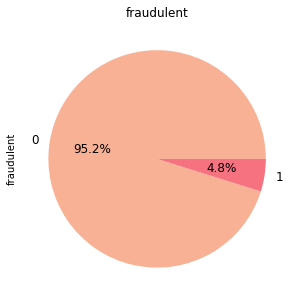

In [21]:
fig_piechart(df, 'fraudulent')

there's only 4,8% fraud on dataset, as expected on fraud where we expect to find small fraud number. Still, we can improve the service and experience by a fraud detection.

however, we need to consider this skewness as it can lead to false negatives, we will do upsampling method to handle this in preprocessing later.

## analysis on numerical features

numerical feature consist of:

numerical = ['salary_min', 'salary_max']

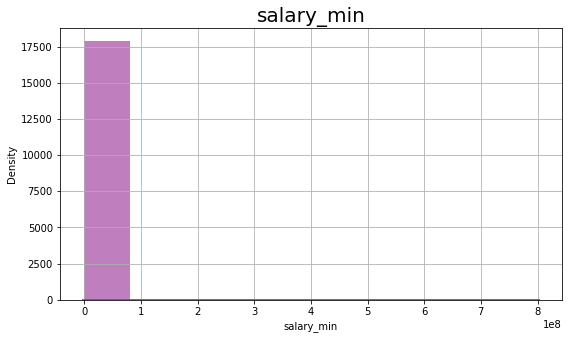

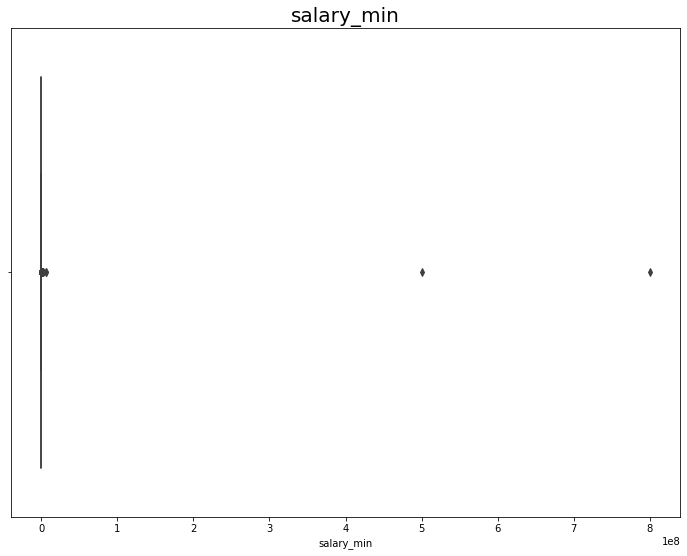

In [22]:
fig_kdeplot(df, 'salary_min')
fig_boxplot(df, 'salary_min')

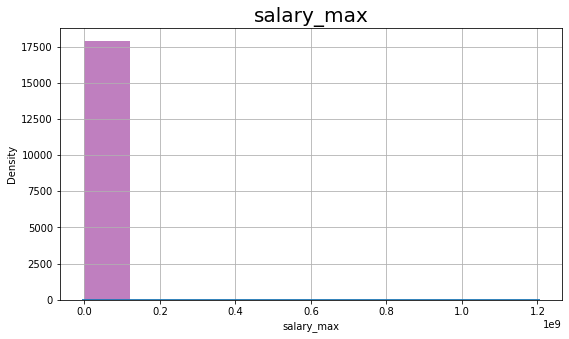

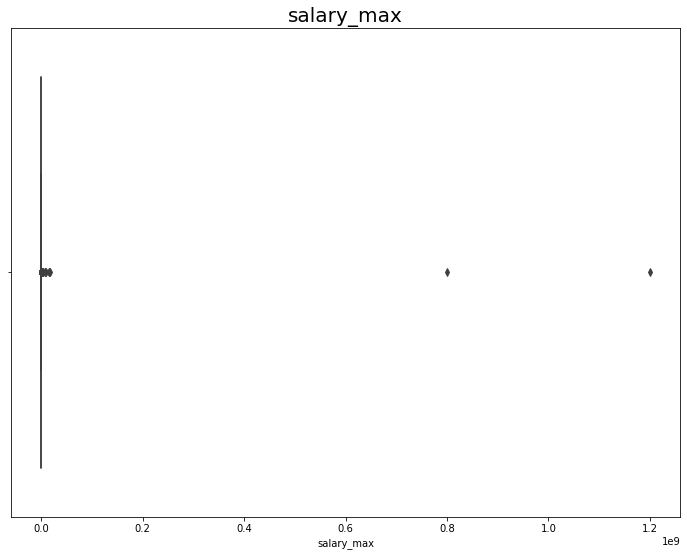

In [23]:
fig_kdeplot(df, 'salary_max')
fig_boxplot(df, 'salary_max')

seems like there's few outlier on 'real' (not fraudulent) data. let's remove it by replacing the value with 0. Since it wasn't fraud case, i think its okay to remove the data.

In [24]:
# from scipy import stats 

In [25]:
# median = df['salary_min'].median()
# std = df['salary_min'].std()
# outliers = (df['salary_min'] - median).abs() > std


# # df.loc[df['salarymin'] == outliers]
# # median = df['salary_max'].median()
# # std = df['salary_max'].std()
# # outliers = (df['salary_max'] - median).abs() > std
# # df[outliers] = 0 

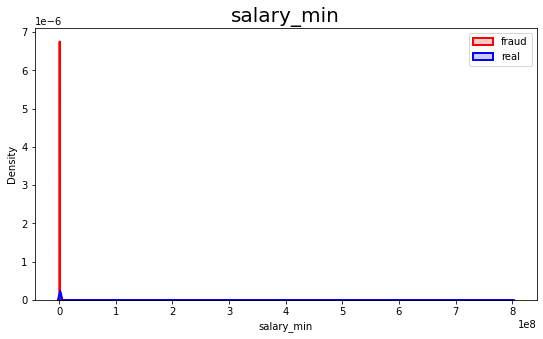

In [26]:
fig_kdeplot_yn(df, 'salary_min')

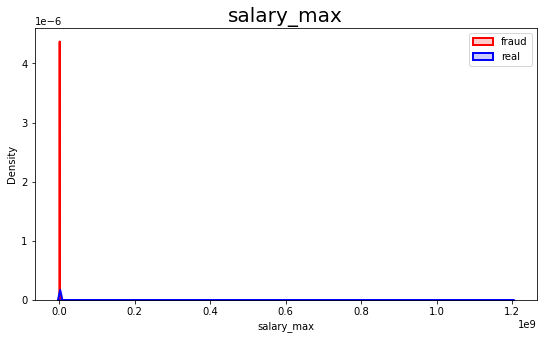

In [27]:
fig_kdeplot_yn(df, 'salary_max')

both data and fraud to real case has simmilar distribution.

## analysis on categorical features

categorical feature consist of:

categorical_feat = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']

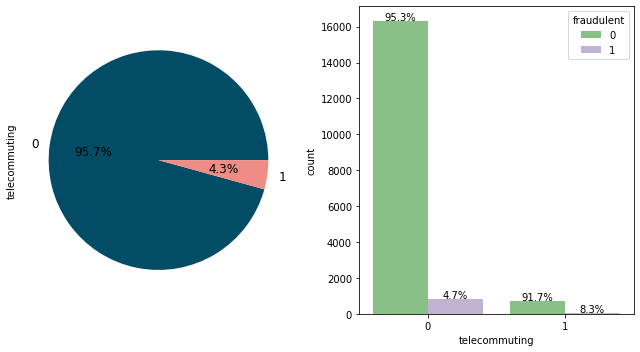

In [28]:
fig_sub_pie(df, 'telecommuting')

there're more fraud that was not telecommuting, however, the dataset skewed, there're 95,8% of total that was telecommuting.

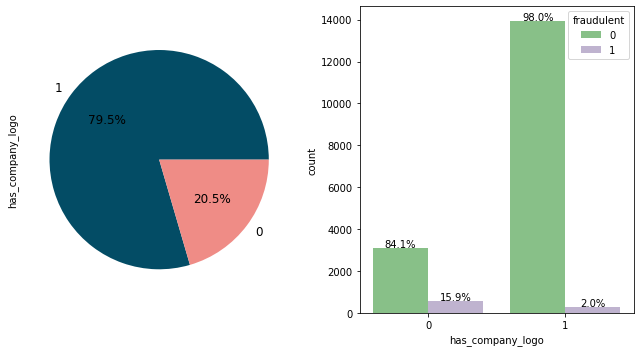

In [29]:
fig_sub_pie(df, 'has_company_logo')

fraud cases more likely to not has_company_logo, with only 2% of data that has_company_logo was a fraud

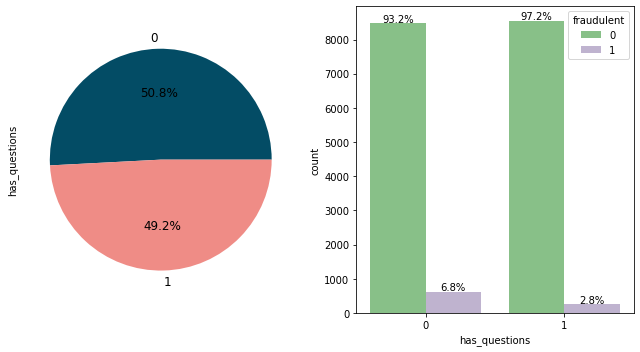

In [30]:
fig_sub_pie(df, 'has_questions')

job who listed questions has balance distribution. There're more cases of fraud who didn't has questions.

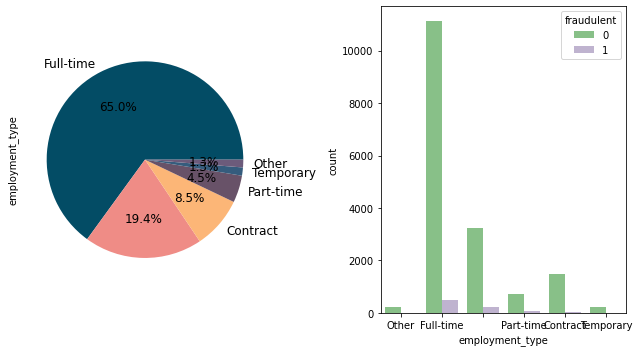

In [31]:
fig_sub_pie_detailed(df, 'employment_type')

the most common employment type is Full-time with 64,4%, followed with not listing with 19,4% and contract with 8,5%. there's no special pattern for fraudulent cases.

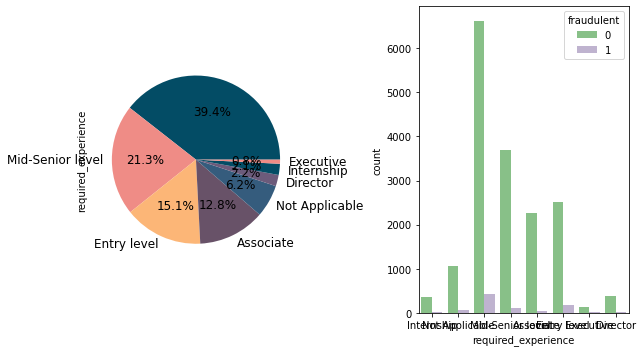

In [32]:
fig_sub_pie_detailed(df, 'required_experience')

39,4% not listed any required experience. 21% required mid-senior level, 15% entry level, and 12,7% associate. There's no special pattern to fraudulent cases.

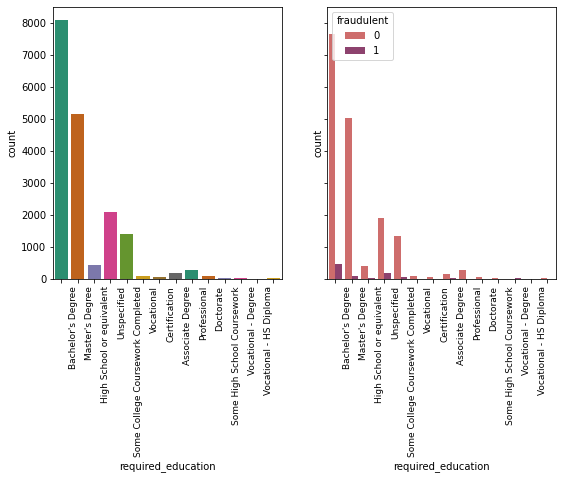

In [33]:
fig_sub_count_detailed(df, 'required_education')

the most common required education is no requirement, followed with bachelor's degree. There's more fraud case happend with no required education listed.

In [34]:
# fig_sub_count_detailed(df, 'industry')

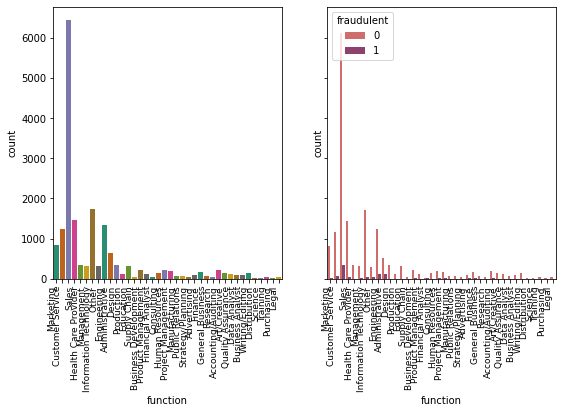

In [35]:
fig_sub_count_detailed(df, 'function')

analysis of correlation matrix on categorical feature.

we can see how feature correlated by making correlation matrix heatmap.


In [36]:
from sklearn.preprocessing import LabelEncoder

first, we need to encode the features

In [37]:
# making new df for encoded categorical feature
categorical_df = df[categorical_feat]
for col in categorical_feat:
    categorical_df[col] = categorical_df[col].astype(str)

In [38]:
# encode for 0 and 1 (yes/no)category:
for i in ['fraudulent', 'telecommuting', 'has_company_logo', 'has_questions']:
    categorical_df[i].replace(to_replace='1', value=1, inplace=True)
    categorical_df[i].replace(to_replace='0', value=0, inplace=True)

<AxesSubplot:>

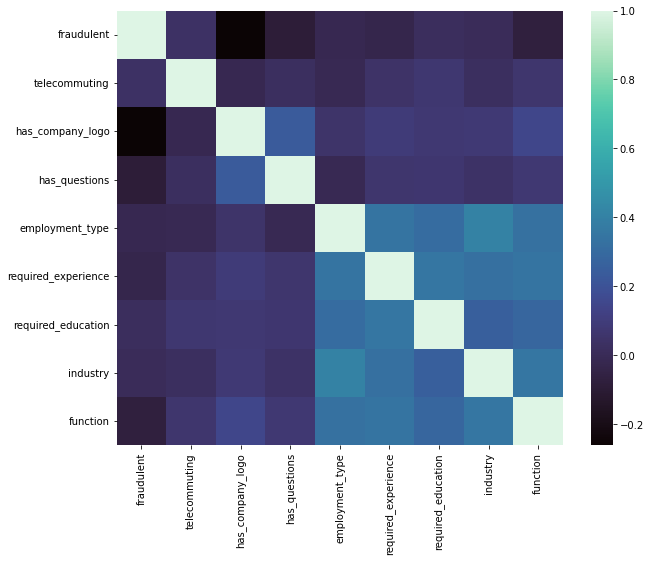

In [39]:
# label encoder
le = LabelEncoder()
categorical_df = categorical_df.apply(le.fit_transform)

fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')

feature_corr = categorical_df.corr()
sns.heatmap(feature_corr, annot=False, cmap='mako')

correlation with fraudulent:

<AxesSubplot:>

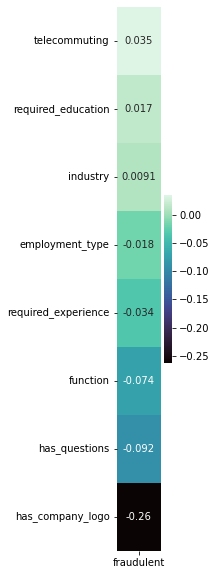

In [40]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(categorical_df.corr()[['fraudulent']].sort_values('fraudulent', ascending=False)[1:], annot=True, cmap="mako")

as we expected by analysis before, 'has_company_logo' correlated well with fraudulent

## analysis on text feature

text feature consist of:

text_feat = ['title', 'location', 'department', 'company_profile', 'description' , 'requirements', 'benefits']

we've make word count dataframe before. let's analyse the word distribution.

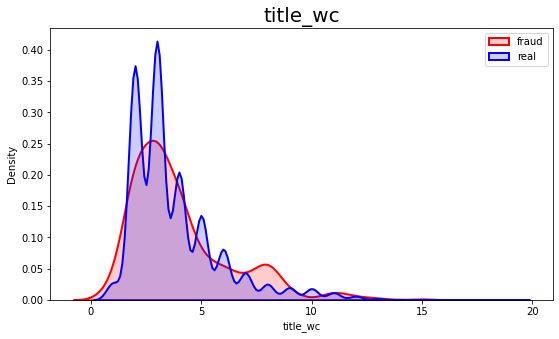

In [41]:
fig_kdeplot_yn(text_count, 'title_wc')

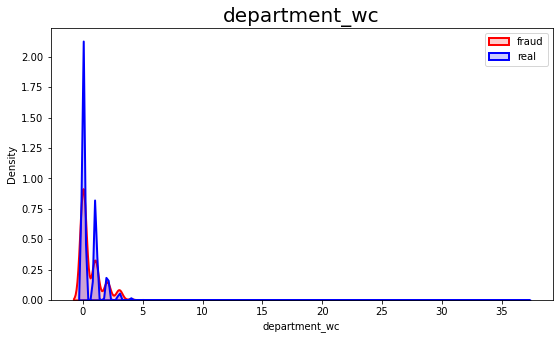

In [42]:
fig_kdeplot_yn(text_count, 'department_wc')

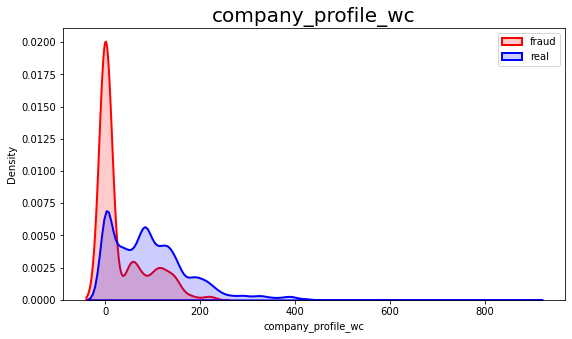

In [43]:
fig_kdeplot_yn(text_count, 'company_profile_wc')

fraud's company profile has lesser word count (more likely 0/doesn't have any company profile)

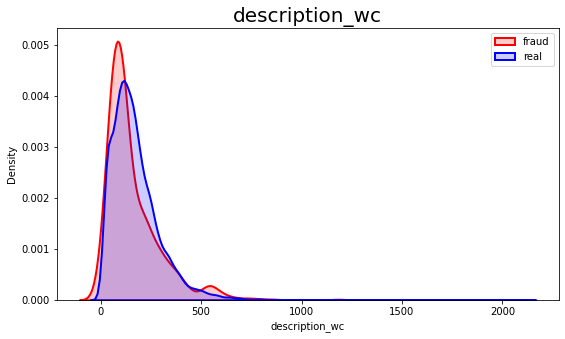

In [44]:
fig_kdeplot_yn(text_count, 'description_wc')

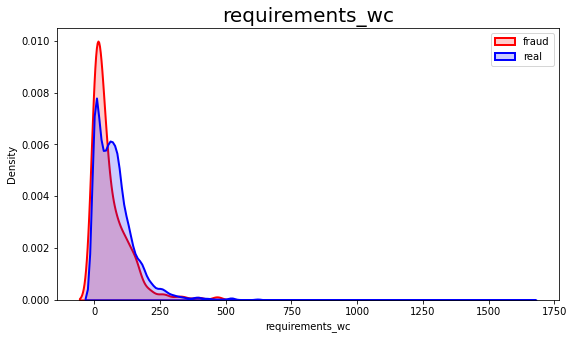

In [45]:
fig_kdeplot_yn(text_count, 'requirements_wc')

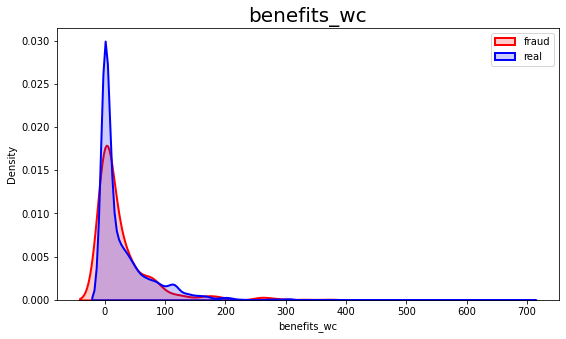

In [46]:
fig_kdeplot_yn(text_count, 'benefits_wc')

# PREPROCESSING

we will do preprocessing to features:

- categorical features    -> encode
- numerical features      -> scale
- word_count  (numerical) -> scale
- text feature            -> text cleaning and vectorize (TF-IDF)
- target column           -> upsample (reduce skewness)

### encode categorical features

categorical feature consist of:

categorical_feat = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


In [47]:
categorical_feat = ['fraudulent', 'telecommuting','has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'function']

we've encode categorical features before when making correlation matrix, we've also saved the values on categorial_df.

In [48]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   fraudulent           17880 non-null  int64
 1   telecommuting        17880 non-null  int64
 2   has_company_logo     17880 non-null  int64
 3   has_questions        17880 non-null  int64
 4   employment_type      17880 non-null  int32
 5   required_experience  17880 non-null  int32
 6   required_education   17880 non-null  int32
 7   industry             17880 non-null  int32
 8   function             17880 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 908.1 KB


### scale numerical feature

numerical feature consist of:

numerical = ['salary_min', 'salary_max']

word_count

In [49]:
numerical_feat = ['salary_min', 'salary_max', 'title_wc', 'location_wc', 'department_wc', 'company_profile_wc', 'description_wc', 'requirements_wc', 'benefits_wc']

In [50]:
numerical_df = pd.DataFrame(df[['salary_min', 'salary_max']])
# add text_count df
numerical_df = numerical_df.join(text_count.copy())
numerical_df.drop('fraudulent', axis=1, inplace=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
# for col in numerical_feat:
numerical_df[numerical_feat] = scaler.fit_transform(numerical_df[numerical_feat])
numerical_df.head()

,salary_min,salary_max,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,0.0,0.0,0.055556,0.181818,0.027027,0.159322,0.058629,0.069909,0.000000
1,0.0,0.0,0.277778,0.136364,0.027027,0.172881,0.148936,0.121581,0.327089
2,0.0,0.0,0.166667,0.136364,0.000000,0.159322,0.023641,0.099696,0.000000
3,0.0,0.0,0.222222,0.136364,0.027027,0.096045,0.163593,0.106991,0.139769
4,0.0,0.0,0.111111,0.181818,0.000000,0.233898,0.079433,0.054103,0.004323


### clean text feature


text feature consist of:

text_feat = ['title', 'location', 'department', 'company_profile', 'description' , 'requirements', 'benefits']

preprocessing/cleaning on text dataset consist of:
1. remove punctuation 
2. tokenize/split
3. remove stopwords
4. lemmatize/stemming
5. remove other (url, html tag, emoji, number)
6. vectorize (TF-IDF)

In [53]:
# cleaned text df
# text_df = pd.DataFrame()
text_df = pd.DataFrame(df[text_feat])
text_df.head(2)

,title,location,department,company_profile,description,requirements,benefits
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...


In [54]:
import string
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
sw = stopwords.words('english') 
import nltk
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# remove punctuation
def remove_punctuation(data):
    removed_punc = [words for words in data if words not in string.punctuation ]
    joined=''.join(removed_punc)
    return joined

for col in text_feat:
    text_df[col] = text_df[col].apply(lambda x: remove_punctuation(x))

text_df.head()

,title,location,department,company_profile,description,requirements,benefits
0,Marketing Intern,US NY New York,Marketing,Were Food52 and weve created a groundbreaking ...,Food52 a fastgrowing James Beard Awardwinning ...,Experience with content management systems a m...,
1,Customer Service Cloud Video Production,NZ Auckland,Success,90 Seconds the worlds Cloud Video Production S...,Organised Focused Vibrant AwesomeDo you hav...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant CMA,US IA Wever,,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement precommissioning and commissioning p...,
3,Account Executive Washington DC,US DC Washington,Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI – Environmental Systems Resea...,EDUCATION Bachelor’s or Master’s in GIS busine...,Our culture is anything but corporate—we have ...
4,Bill Review Manager,US FL Fort Worth,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review ManagerLOCATION F...,QUALIFICATIONSRN license in the State of Texas...,Full Benefits Offered


In [56]:
# tokenize
def tokenize(data):
    split = re.split("\W+",data) 
    return split

for col in text_feat:
    text_df[col] = text_df[col].apply(lambda x: tokenize(x.lower()))

text_df.head(2)

,title,location,department,company_profile,description,requirements,benefits
0,"[marketing, intern]","[us, ny, new, york]",[marketing],"[were, food52, and, weve, created, a, groundbr...","[food52, a, fastgrowing, james, beard, awardwi...","[experience, with, content, management, system...",[]
1,"[customer, service, cloud, video, production]","[nz, auckland]",[success],"[90, seconds, the, worlds, cloud, video, produ...","[organised, focused, vibrant, awesomedo, you, ...","[what, we, expect, from, youyour, key, respons...","[what, you, will, get, from, usthrough, being,..."


In [57]:
# remove stopwords
def remove_stopwords(data):
    data = [words for words in data if words not in sw]
    return data

for col in text_feat:
    text_df[col] = text_df[col].apply(lambda x: remove_stopwords(x))

text_df.head(2)

,title,location,department,company_profile,description,requirements,benefits
0,"[marketing, intern]","[us, ny, new, york]",[marketing],"[food52, weve, created, groundbreaking, awardw...","[food52, fastgrowing, james, beard, awardwinni...","[experience, content, management, systems, maj...",[]
1,"[customer, service, cloud, video, production]","[nz, auckland]",[success],"[90, seconds, worlds, cloud, video, production...","[organised, focused, vibrant, awesomedo, passi...","[expect, youyour, key, responsibility, communi...","[get, usthrough, part, 90, seconds, team, gain..."


In [58]:
# lemmatize/stemming
lemmatizer = WordNetLemmatizer()

def lemmatize(data):    
    lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in data])
    return lemmatized

for col in text_feat:
    text_df[col] = text_df[col].apply(lambda x: lemmatize(x))

text_df.head(2)

,title,location,department,company_profile,description,requirements,benefits
0,marketing intern,u ny new york,marketing,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management system major plu...,
1,customer service cloud video production,nz auckland,success,90 second world cloud video production service...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part 90 second team gainexperien...


In [59]:
# remove url, html tag <>, emoji, number
def clean_etc(data):
    # url
    data = re.sub(r'^https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    # html tag < >
    data = re.sub('<.*?>+', '', data)
    # emoji
    regrex_emoji = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags = re.UNICODE)
    data = regrex_emoji.sub(r'',data)
    # number
    data = ''.join([words for words in data if not words.isdigit()])
    return data

for col in text_feat:
    text_df[col] = text_df[col].apply(lambda x: clean_etc(x))

text_df.head(2)

,title,location,department,company_profile,description,requirements,benefits
0,marketing intern,u ny new york,marketing,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management system major plu...,
1,customer service cloud video production,nz auckland,success,second world cloud video production service s...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part second team gainexperience...


In [60]:
# combine text column to vectorize
text_df['combined_text'] = text_df['title'] + " " + text_df['location'] + " " + text_df['department'] + " " + text_df['company_profile'] + " " + text_df['description'] + " " + text_df['requirements'] + " " + text_df['benefits']

In [61]:
# vectorize
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer()

text_vector = vectorizer.fit_transform(text_df['combined_text'])
print(text_vector)

  (0, 59819)	0.027309551863830203
  (0, 74225)	0.030334361152318537
  (0, 147683)	0.04394018777913672
  (0, 45822)	0.047572974176869794
  (0, 16641)	0.03041570840576102
  (0, 127645)	0.02695310578425739
  (0, 149552)	0.034716212489316604
  (0, 108404)	0.053670635093784703
  (0, 130809)	0.08626722221337124
  (0, 121642)	0.05029114761755939
  (0, 36784)	0.06326913858540961
  (0, 23514)	0.013974523906885658
  (0, 116453)	0.03855279588626088
  (0, 56308)	0.07950725215094724
  (0, 85473)	0.07950725215094724
  (0, 95927)	0.051165096941687215
  (0, 95661)	0.051280059867622525
  (0, 52513)	0.08496494725380731
  (0, 38316)	0.025999029482814393
  (0, 22289)	0.05175396242089056
  (0, 101731)	0.046152802311339704
  (0, 95791)	0.08626722221337124
  (0, 48762)	0.040163016607070466
  (0, 140496)	0.04105316174220346
  (0, 78922)	0.02539760492301426
  :	:
  (17879, 46872)	0.02540632758216891
  (17879, 34677)	0.022543510588827212
  (17879, 149267)	0.08664174810574307
  (17879, 66335)	0.04389611701525932

In [62]:
# text_vector.todense()

In [63]:
vector_df = pd.DataFrame(text_vector, columns=['tfidf'])

### combine df
we've encode, scale, and vectorize data. lets combine them to one dataframe.

In [64]:
# cleaned_df = pd.DataFrame()

In [65]:
cleaned_df = categorical_df.copy()
# cleaned_df = cleaned_df.join(categorical_df.copy())
cleaned_df = cleaned_df.join(numerical_df.copy())
cleaned_df = cleaned_df.join(vector_df.copy())
# cleaned_df = cleaned_df.join(text_df['combined_text'].copy())

In [66]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fraudulent           17880 non-null  int64  
 1   telecommuting        17880 non-null  int64  
 2   has_company_logo     17880 non-null  int64  
 3   has_questions        17880 non-null  int64  
 4   employment_type      17880 non-null  int32  
 5   required_experience  17880 non-null  int32  
 6   required_education   17880 non-null  int32  
 7   industry             17880 non-null  int32  
 8   function             17880 non-null  int32  
 9   salary_min           17880 non-null  float64
 10  salary_max           17880 non-null  float64
 11  title_wc             17880 non-null  float64
 12  location_wc          17880 non-null  float64
 13  department_wc        17880 non-null  float64
 14  company_profile_wc   17880 non-null  float64
 15  description_wc       17880 non-null 

### handling skewness of 'fraudulent' data.

we aply upsample on the data. upsampling is process of resampling or generating data correspond to minority class. This make data added with the target 'fraudulent'

In [67]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [68]:
# handling skewness on churn
zero  = cleaned_df[cleaned_df['fraudulent']==0]
one = cleaned_df[cleaned_df['fraudulent']==1]

# upsample minority (fraudulent)
upsample = resample(one, replace = True, n_samples = 7000) 
cleaned_df = pd.concat([zero, upsample])

cleaned_df = shuffle(cleaned_df)

In [69]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24014 entries, 4004 to 17542
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fraudulent           24014 non-null  int64  
 1   telecommuting        24014 non-null  int64  
 2   has_company_logo     24014 non-null  int64  
 3   has_questions        24014 non-null  int64  
 4   employment_type      24014 non-null  int32  
 5   required_experience  24014 non-null  int32  
 6   required_education   24014 non-null  int32  
 7   industry             24014 non-null  int32  
 8   function             24014 non-null  int32  
 9   salary_min           24014 non-null  float64
 10  salary_max           24014 non-null  float64
 11  title_wc             24014 non-null  float64
 12  location_wc          24014 non-null  float64
 13  department_wc        24014 non-null  float64
 14  company_profile_wc   24014 non-null  float64
 15  description_wc       24014 non-nu

In [70]:
cleaned_df.head()

,fraudulent,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_min,salary_max,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc,tfidf
4004,1,0,0,0,2,3,10,1,2,0.000015,0.000014,0.055556,0.181818,0.000000,0.000000,0.008511,0.060182,0.074928,"(0, 87131)\t0.14240905418546154\n (0, 43073..."
4765,0,0,1,1,0,0,0,0,0,0.000000,0.000000,0.055556,0.136364,0.000000,0.244068,0.123877,0.016413,0.060519,"(0, 59437)\t0.07632702753471472\n (0, 85842..."
11053,0,0,1,1,2,7,0,62,19,0.000000,0.000000,0.111111,0.136364,0.000000,0.085876,0.059574,0.053495,0.132565,"(0, 115371)\t0.11857564239749126\n (0, 1415..."
4403,0,0,1,0,2,1,10,76,32,0.000000,0.000000,0.055556,0.136364,0.027027,0.141243,0.181087,0.070517,0.010086,"(0, 23996)\t0.07782457101293054\n (0, 73981..."
10252,0,0,0,0,2,6,0,0,0,0.000000,0.000000,0.222222,0.090909,0.000000,0.000000,0.021277,0.000000,0.000000,"(0, 39717)\t0.38563377056016024\n (0, 53420..."


# TRAIN TEST SPLIT

Train and Test split with Cross Validation to avoid overfit.

In [71]:
y = cleaned_df.fraudulent
x = cleaned_df.drop('fraudulent', axis=1)
x = x.drop('tfidf', axis=1) # problem with cxr matrix and unable to convert to dense/array
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [72]:
from sklearn.model_selection import StratifiedKFold

In [73]:
skf = StratifiedKFold(n_splits=4)
# X, y = data.drop('fraudulent', axis=1), data.fraudulent

In [74]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 5997  5998  5999 ... 24011 24012 24013] TEST: [   0    1    2 ... 6022 6023 6028]
TRAIN: [    0     1     2 ... 24011 24012 24013] TEST: [ 5997  5998  5999 ... 12109 12117 12129]
TRAIN: [    0     1     2 ... 24011 24012 24013] TEST: [11957 11958 11959 ... 18175 18178 18182]
TRAIN: [    0     1     2 ... 18175 18178 18182] TEST: [17948 17949 17951 ... 24011 24012 24013]


In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24014 entries, 4004 to 17542
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   telecommuting        24014 non-null  int64  
 1   has_company_logo     24014 non-null  int64  
 2   has_questions        24014 non-null  int64  
 3   employment_type      24014 non-null  int32  
 4   required_experience  24014 non-null  int32  
 5   required_education   24014 non-null  int32  
 6   industry             24014 non-null  int32  
 7   function             24014 non-null  int32  
 8   salary_min           24014 non-null  float64
 9   salary_max           24014 non-null  float64
 10  title_wc             24014 non-null  float64
 11  location_wc          24014 non-null  float64
 12  department_wc        24014 non-null  float64
 13  company_profile_wc   24014 non-null  float64
 14  description_wc       24014 non-null  float64
 15  requirements_wc      24014 non-nu

# MODEL BUILDING

In [76]:
from sklearn.model_selection import cross_validate

In [77]:
# list model name and accuracies
models = []
accuracies = []

## 1. LOGISTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

cv_scores = cross_validate(logreg, x, y, return_train_score=True, cv=skf, 
                           scoring=['accuracy', 'roc_auc'], n_jobs=-1)

In [79]:
print(cv_scores)

{'fit_time': array([0.20348239, 0.20447898, 0.20447898, 0.20447898]), 'score_time': array([0.00900626, 0.00800967, 0.00800967, 0.00800967]), 'test_accuracy': array([0.79213857, 0.80046636, 0.8045977 , 0.78677328]), 'train_accuracy': array([0.79261521, 0.79966685, 0.8012881 , 0.79368164]), 'test_roc_auc': array([0.80633783, 0.80694137, 0.8087203 , 0.80323093]), 'train_roc_auc': array([0.81013648, 0.80743578, 0.80530608, 0.80681586])}


In [80]:
acc = 0
for i in range(4):
    acc = acc + cv_scores['test_accuracy'][i]
acc = acc/4

models.append('Logistic Regression')
accuracies.append(acc)

## 2. RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=9, max_depth=5, min_samples_leaf=3)

cv_scores = cross_validate(rf, x, y, return_train_score=True, cv=skf, 
                           scoring=['accuracy', 'roc_auc'], n_jobs=-1)

In [82]:
print(cv_scores)

{'fit_time': array([0.10437584, 0.10437584, 0.10199761, 0.0988915 ]), 'score_time': array([0.01599884, 0.01599884, 0.01599884, 0.01604533]), 'test_accuracy': array([0.86059294, 0.85343105, 0.86090288, 0.86590038]), 'train_accuracy': array([0.86363132, 0.85558023, 0.86125146, 0.86780301]), 'test_roc_auc': array([0.92503405, 0.92541333, 0.92671418, 0.92753109]), 'train_roc_auc': array([0.93034366, 0.92809914, 0.92797118, 0.93237655])}


In [83]:
acc = 0
for i in range(4):
    acc = acc + cv_scores['test_accuracy'][i]
acc = acc/4

models.append('Random Forest')
accuracies.append(acc)

## 3. SVM

In [84]:
from sklearn import svm
svmc = svm.SVC()

cv_scores = cross_validate(svmc, x, y, return_train_score=True, cv=skf, 
                           scoring=['accuracy', 'roc_auc'], n_jobs=-1)

In [85]:
print(cv_scores)

{'fit_time': array([12.10346055, 12.27145648, 12.54048371, 12.07632422]), 'score_time': array([13.99681234, 13.55411553, 14.02180362, 13.73006654]), 'test_accuracy': array([0.74533644, 0.74716855, 0.75578877, 0.75179077]), 'train_accuracy': array([0.75158245, 0.75097168, 0.74954195, 0.74981955]), 'test_roc_auc': array([0.81107757, 0.81149654, 0.81251755, 0.808734  ]), 'train_roc_auc': array([0.81122278, 0.81076673, 0.81347637, 0.81533655])}


In [86]:
acc = 0
for i in range(4):
    acc = acc + cv_scores['test_accuracy'][i]
acc = acc/4

models.append('SVM')
accuracies.append(acc)

## 4. XG BOOST

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss', n_estimators=7, max_depth=3, min_samples_leaf=2)

cv_scores = cross_validate(xgb, x, y, return_train_score=True, cv=skf, 
                           scoring=['accuracy', 'roc_auc'], n_jobs=-1)

In [88]:
print(cv_scores)

{'fit_time': array([1.06348538, 1.06348538, 0.97552967, 1.05516577]), 'score_time': array([0.01581216, 0.01581216, 0.01562881, 0.01581216]), 'test_accuracy': array([0.85443038, 0.85276482, 0.8617358 , 0.84074629]), 'train_accuracy': array([0.85446974, 0.85841199, 0.85303426, 0.84631614]), 'test_roc_auc': array([0.91304829, 0.91263792, 0.91853005, 0.90835619]), 'train_roc_auc': array([0.91495667, 0.91381355, 0.91756029, 0.91423286])}


In [89]:
acc = 0
for i in range(4):
    acc = acc + cv_scores['test_accuracy'][i]
acc = acc/4

models.append('XG Boost')
accuracies.append(acc)

# MODEL COMPARISION

In [90]:
df_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
df_model = df_model.sort_values(by='acc', ascending=False)

In [91]:
print(df_model)

                 model       acc
1        Random Forest  0.860207
3             XG Boost  0.852419
0  Logistic Regression  0.795994
2                  SVM  0.750021


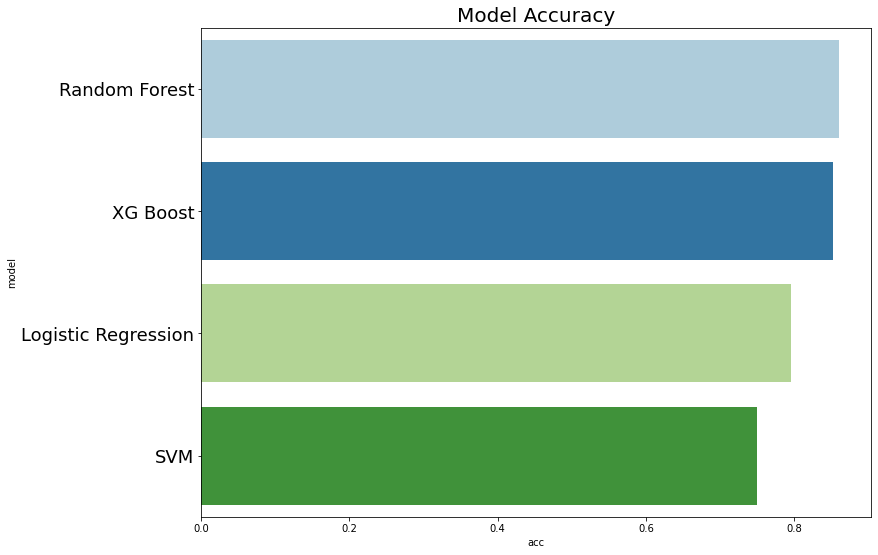

In [92]:
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
ax = sns.barplot(data=df_model, x='acc', y='model', palette='Paired')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.show()

Random Forest has highest accuracy with 86,4%

# CONCLUSION

we've build simple fraud detection model to detect fraudulent on job posting dataset. [NOTE:] there are few problem that not yet resolved such as fiting csr matrix from vectorized text data that cannot be fit. This notebook will be updated soon. 

I would also thanks to this notebook that help me to preprocess text data: https://www.kaggle.com/rawaaelghali/real-or-not-nlp-with-disaster-tweets/ 